In [1]:
from phimal_utilities.analysis import Results, load_tensorboard
import numpy as np
import os
from natsort import natsorted

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

%config InlineBackend.figure_format = 'svg'

sns.set_context('paper')
sns.set_style('white')

In [2]:
# Loading files from baseline
files = natsorted([file for file in os.listdir('grad/data/') if file[:len('grad')] == 'grad'])
df_grad = [load_tensorboard(f'grad/data/{file}') for file in files]

keys = Results('grad/data/grad_run_0/').keys # loading keys

In [3]:
# Loading files from multitask
files = natsorted([file for file in os.listdir('lstsq/data/') if file[:len('lstsq')] == 'lstsq'])
df_lstsq = [load_tensorboard(f'lstsq/data/{file}') for file in files]

# paper plot

In [141]:
epoch = df_grad[0].index.to_numpy().squeeze()

# Train loss
train_average_loss_grad = np.mean(np.log(np.stack([df[keys['reg']].to_numpy() + df[keys['mse']].to_numpy() for df in df_grad], axis=1)), axis=1).squeeze()
train_std_loss_grad = np.std(np.log(np.stack([df[keys['reg']].to_numpy() + df[keys['mse']].to_numpy() for df in df_grad], axis=1)), axis=1).squeeze()
train_average_loss_lstsq = np.mean(np.log(np.stack([df[keys['reg']].to_numpy() + df[keys['mse']].to_numpy() for df in df_lstsq], axis=1)), axis=1).squeeze()
train_std_loss_lstsq = np.std(np.log(np.stack([df[keys['reg']].to_numpy() + df[keys['mse']].to_numpy() for df in df_lstsq], axis=1)), axis=1).squeeze()

# Test loss
test_average_loss_grad = np.mean(np.log(np.stack([df['remaining_MSE_test'].to_numpy() + df['remaining_Reg_test'].to_numpy() for df in df_grad], axis=1)), axis=1).squeeze()
test_std_loss_grad = np.std(np.log(np.stack([df['remaining_MSE_test'].to_numpy() + df['remaining_Reg_test'].to_numpy() for df in df_grad], axis=1)), axis=1).squeeze()
test_average_loss_lstsq = np.mean(np.log(np.stack([df['remaining_MSE_test'].to_numpy() + df['remaining_Reg_test'].to_numpy() for df in df_lstsq], axis=1)), axis=1).squeeze()
test_std_loss_lstsq = np.std(np.log(np.stack([df['remaining_MSE_test'].to_numpy() + df['remaining_Reg_test'].to_numpy() for df in df_lstsq], axis=1)), axis=1).squeeze()

# Coefficient error
true_coeffs = np.zeros_like(df_lstsq[0][keys['unscaled_coeffs']].tail(1).to_numpy())
true_coeffs[0, 2] = 0.1
true_coeffs[0, 5] = -1

MAE_lstsq = np.mean(np.log(np.stack([np.mean(np.abs(df[keys['unscaled_coeffs']] - true_coeffs), axis=1) for df in df_lstsq], axis=1)), axis=1)
MAE_grad = np.mean(np.log(np.stack([np.mean(np.abs(df[keys['unscaled_coeffs']] - true_coeffs), axis=1) for df in df_grad], axis=1)), axis=1)

MAE_lstsq_std = np.std(np.log(np.stack([np.mean(np.abs(df[keys['unscaled_coeffs']] - true_coeffs), axis=1) for df in df_lstsq], axis=1)), axis=1)
MAE_grad_std = np.std(np.log(np.stack([np.mean(np.abs(df[keys['unscaled_coeffs']] - true_coeffs), axis=1) for df in df_grad], axis=1)), axis=1)

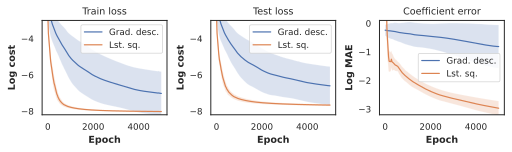

In [185]:
fig, axes = plt.subplots(figsize=(7, 2), nrows=1, ncols=3, constrained_layout=True)
cmap = plt.get_cmap("tab10")

ax = axes[0]
ax.fill_between(epoch, train_average_loss_grad - train_std_loss_grad, train_average_loss_grad + train_std_loss_grad, alpha=0.2)
ax.plot(epoch, train_average_loss_grad, label='Grad. desc.')

ax.fill_between(epoch, train_average_loss_lstsq - train_std_loss_lstsq, train_average_loss_lstsq + train_std_loss_lstsq, alpha=0.2)
ax.plot(epoch, train_average_loss_lstsq, label='Lst. sq.')

ax.legend()
ax.set_title('Train loss')
ax.set_ylim([-8.2, -3])
ax.set_xlabel('Epoch', weight='bold')
ax.set_ylabel('Log cost', weight='bold')

ax = axes[1]
ax.fill_between(epoch, test_average_loss_grad - test_std_loss_grad, test_average_loss_grad + test_std_loss_grad, alpha=0.2)
ax.plot(epoch, test_average_loss_grad, label='Grad. desc.')

ax.fill_between(epoch, test_average_loss_lstsq - test_std_loss_lstsq, test_average_loss_lstsq + test_std_loss_lstsq, alpha=0.2)
ax.plot(epoch, test_average_loss_lstsq, label='Lst. sq.')

ax.legend()
ax.set_title('Test loss')
ax.set_ylim([-8.2, -3])
ax.set_xlabel('Epoch', weight='bold')
ax.set_ylabel('Log cost', weight='bold')

ax = axes[2]
ax.fill_between(epoch, MAE_grad - MAE_grad_std, MAE_grad + MAE_grad_std, alpha=0.2)
ax.plot(epoch, MAE_grad, label='Grad. desc.')

ax.fill_between(epoch, MAE_lstsq - MAE_lstsq_std, MAE_lstsq + MAE_lstsq_std, alpha=0.2)
ax.plot(epoch, MAE_lstsq, label='Lst. sq.')

ax.legend()
ax.set_ylim([-3.2, 0.1])
ax.set_title('Coefficient error')
ax.set_xlabel('Epoch', weight='bold')
ax.set_ylabel('Log MAE', weight='bold')

plt.legend()

fig.savefig('grad_vs_lstsq.pdf', bbox_inches='tight')

Text(0.5, 0.98, 'Train set')

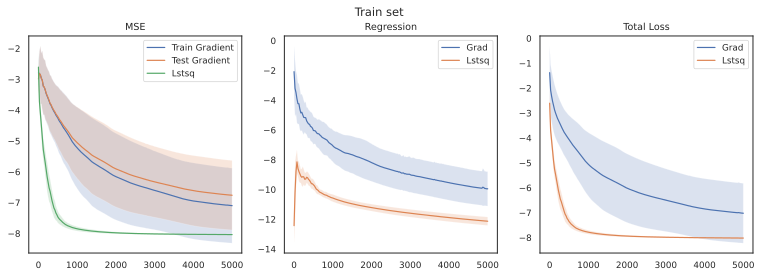

In [135]:
plt.figure(figsize=(13, 4))
cmap = plt.get_cmap("tab10")

plt.subplot(131)
# Plottting
plt.fill_between(epoch, train_average_mse_grad - train_std_mse_grad, train_average_mse_grad + train_std_mse_grad, alpha=0.2)
plt.plot(epoch, train_average_mse_grad, label='Train Gradient')

plt.fill_between(epoch, test_average_mse_grad - test_std_mse_grad, test_average_mse_grad + test_std_mse_grad, alpha=0.2)
plt.plot(epoch, test_average_mse_grad, label='Test Gradient')


plt.fill_between(epoch, train_average_mse - train_std_mse_grad, train_average_mse_grad + train_std_mse_grad, alpha=0.2)
plt.plot(epoch, train_average_mse_grad, label='Train Gradient')

plt.fill_between(epoch, test_average_mse_grad - test_std_mse_grad, test_average_mse_grad + test_std_mse_grad, alpha=0.2)
plt.plot(epoch, test_average_mse_grad, label='Test Gradient')

plt.legend()
plt.title('MSE')

plt.subplot(132)
plt.fill_between(epoch, average_reg_grad - std_reg_grad, average_reg_grad + std_reg_grad, alpha=0.2)
plt.plot(epoch, average_reg_grad, label='Grad')
plt.plot()

plt.fill_between(epoch, average_reg_lstsq - std_reg_lstsq, average_reg_lstsq + std_reg_lstsq, alpha=0.2)
plt.plot(epoch, average_reg_lstsq, label='Lstsq')

plt.legend()
plt.title('Regression')

plt.subplot(133)

plt.fill_between(epoch, average_loss_grad - std_loss_grad, average_loss_grad + std_loss_grad, alpha=0.2)
plt.plot(epoch, average_loss_grad, label='Grad')

plt.fill_between(epoch, average_loss_lstsq - std_loss_lstsq, average_loss_lstsq + std_loss_lstsq, alpha=0.2)
plt.plot(epoch, average_loss_lstsq, label='Lstsq')

plt.legend()
plt.title('Total Loss')

plt.suptitle('Train set')

In [ ]:
# Averaging runs MSE
train_average_mse_grad = np.mean(np.log(np.stack([df[keys['mse']] for df in df_grad], axis=1)), axis=1).squeeze()
train_std_mse_grad = np.std(np.log(np.stack([df[keys['mse']] for df in df_grad], axis=1)), axis=1).squeeze()

train_average_mse_lstsq = np.mean(np.log(np.stack([df[keys['mse']] for df in df_lstsq], axis=1)), axis=1).squeeze()
train_std_mse_lstsq = np.std(np.log(np.stack([df[keys['mse']] for df in df_lstsq], axis=1)), axis=1).squeeze()

test_average_mse_grad = np.mean(np.log(np.stack([df['remaining_MSE_test'] for df in df_grad], axis=1)), axis=1).squeeze()
test_std_mse_grad = np.std(np.log(np.stack([df['remaining_MSE_test'] for df in df_grad], axis=1)), axis=1).squeeze()

test_average_mse_lstsq = np.mean(np.log(np.stack([df['remaining_MSE_test'] for df in df_lstsq], axis=1)), axis=1).squeeze()
test_std_mse_lstsq = np.std(np.log(np.stack([df['remaining_MSE_test'] for df in df_lstsq], axis=1)), axis=1).squeeze()

# Averaging runs Reg
average_reg_grad = np.mean(np.log(np.stack([df[keys['reg']] for df in df_grad], axis=1)), axis=1).squeeze()
std_reg_grad = np.std(np.log(np.stack([df[keys['reg']] for df in df_grad], axis=1)), axis=1).squeeze()

average_reg_lstsq = np.mean(np.log(np.stack([df[keys['reg']] for df in df_lstsq], axis=1)), axis=1).squeeze()
std_reg_lst

In [78]:
df_grad[0].keys()

Index(['loss_loss', 'remaining_MSE_test', 'remaining_Reg_test',
       'remaining_loss_test', 'unscaled_coeffs_output_0_coeff_9',
       'estimator_coeffs_output_0_coeff_8',
       'estimator_coeffs_output_0_coeff_2',
       'unscaled_coeffs_output_0_coeff_11',
       'unscaled_coeffs_output_0_coeff_10', 'coeffs_output_0_coeff_5',
       'coeffs_output_0_coeff_11', 'estimator_coeffs_output_0_coeff_0',
       'unscaled_coeffs_output_0_coeff_0', 'loss_mse_output_0',
       'coeffs_output_0_coeff_10', 'coeffs_output_0_coeff_8',
       'unscaled_coeffs_output_0_coeff_2', 'unscaled_coeffs_output_0_coeff_4',
       'loss_l1_output_0', 'loss_reg_output_0',
       'unscaled_coeffs_output_0_coeff_5', 'estimator_coeffs_output_0_coeff_9',
       'estimator_coeffs_output_0_coeff_7', 'coeffs_output_0_coeff_7',
       'unscaled_coeffs_output_0_coeff_6', 'estimator_coeffs_output_0_coeff_5',
       'coeffs_output_0_coeff_4', 'unscaled_coeffs_output_0_coeff_1',
       'estimator_coeffs_output_0_coeff_1

In [85]:
# MSE of test set
average_mse_grad = np.mean(np.log(np.stack([df['remaining_MSE_test'] for df in df_grad], axis=1)), axis=1).squeeze()
std_mse_grad = np.std(np.log(np.stack([df['remaining_MSE_test'] for df in df_grad], axis=1)), axis=1).squeeze()

average_mse_lstsq = np.mean(np.log(np.stack([df['remaining_MSE_test'] for df in df_lstsq], axis=1)), axis=1).squeeze()
std_mse_lstsq = np.std(np.log(np.stack([df['remaining_MSE_test'] for df in df_lstsq], axis=1)), axis=1).squeeze()

# Reg of test set 
average_reg_grad = np.mean(np.log(np.stack([df['remaining_Reg_test'] for df in df_grad], axis=1)), axis=1).squeeze()
std_reg_grad = np.std(np.log(np.stack([df['remaining_Reg_test'] for df in df_grad], axis=1)), axis=1).squeeze()

average_reg_lstsq = np.mean(np.log(np.stack([df['remaining_Reg_test'] for df in df_lstsq], axis=1)), axis=1).squeeze()
std_reg_lstsq = np.std(np.log(np.stack([df['remaining_Reg_test'] for df in df_lstsq], axis=1)), axis=1).squeeze()

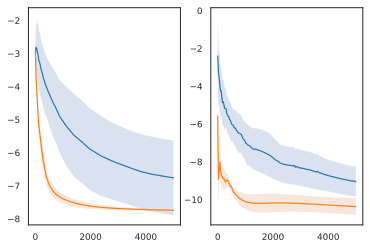

In [88]:
plt.subplot(121)
plt.fill_between(epoch, average_mse_grad - std_mse_grad, average_mse_grad + std_mse_grad, alpha=0.2)
plt.plot(epoch, average_mse_grad, label='Gradient', color=cmap(0))


plt.fill_between(epoch, average_mse_lstsq - std_mse_lstsq, average_mse_lstsq + std_mse_lstsq, alpha=0.2)
plt.plot(epoch, average_mse_lstsq, label='Lstsq', color=cmap(1))

plt.subplot(122)
plt.fill_between(epoch, average_reg_grad - std_reg_grad, average_reg_grad + std_reg_grad, alpha=0.2)
plt.plot(epoch, average_reg_grad, label='Gradient', color=cmap(0))


plt.fill_between(epoch, average_reg_lstsq - std_reg_lstsq, average_reg_lstsq + std_reg_lstsq, alpha=0.2)
plt.plot(epoch, average_reg_lstsq, label='Lstsq', color=cmap(1))


In [6]:
# Averaging runs MSE
mse_grad = np.log(np.stack([df[keys['mse']] for df in df_grad], axis=1)).squeeze()
mse_lstsq = np.log(np.stack([df[keys['mse']] for df in df_lstsq], axis=1)).squeeze()

# Averaging runs Reg
reg_grad = np.log(np.stack([df[keys['reg']] for df in df_grad], axis=1)).squeeze()
reg_lstsq = np.log(np.stack([df[keys['reg']] for df in df_lstsq], axis=1)).squeeze()

# Averaging runs Reg
loss_grad = np.log(np.stack([df[keys['reg']].to_numpy() + df[keys['mse']].to_numpy() for df in df_grad], axis=1)).squeeze()
loss_lstsq = np.log(np.stack([df[keys['reg']].to_numpy() + df[keys['mse']].to_numpy() for df in df_lstsq], axis=1)).squeeze()

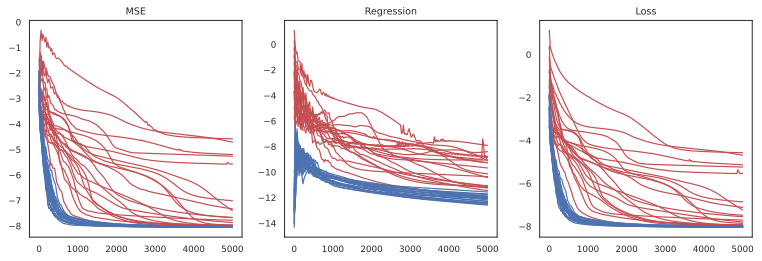

In [62]:
plt.figure(figsize=(13, 4))

plt.subplot(131)
plt.title('MSE')
plt.plot(epoch, mse_grad, 'r')
plt.plot(epoch, mse_lstsq, 'b')


plt.subplot(132)
plt.title('Regression')
plt.plot(epoch, reg_grad, 'r')
plt.plot(epoch, reg_lstsq, 'b')

plt.subplot(133)
plt.title('Loss')
plt.plot(epoch, loss_grad, 'r')
plt.plot(epoch, loss_lstsq, 'b')

plt.show()

In [30]:
true_coeffs = np.zeros_like(df_lstsq[0][keys['unscaled_coeffs']].tail(1).to_numpy())
true_coeffs[0, 2] = 0.1
true_coeffs[0, 5] = -1

In [31]:
MAE_lstsq = np.mean(np.log(np.stack([np.mean(np.abs(df[keys['unscaled_coeffs']] - true_coeffs), axis=1) for df in df_lstsq], axis=1)), axis=1)
MAE_grad = np.mean(np.log(np.stack([np.mean(np.abs(df[keys['unscaled_coeffs']] - true_coeffs), axis=1) for df in df_grad], axis=1)), axis=1)

MAE_lstsq_std = np.std(np.log(np.stack([np.mean(np.abs(df[keys['unscaled_coeffs']] - true_coeffs), axis=1) for df in df_lstsq], axis=1)), axis=1)
MAE_grad_std = np.std(np.log(np.stack([np.mean(np.abs(df[keys['unscaled_coeffs']] - true_coeffs), axis=1) for df in df_grad], axis=1)), axis=1)

Text(0.5, 1.0, 'Mean coeff error')

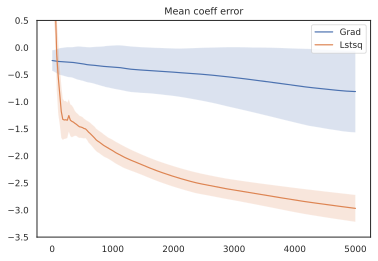

In [35]:
plt.fill_between(epoch, MAE_grad - MAE_grad_std, MAE_grad + MAE_grad_std, alpha=0.2)
plt.plot(epoch, MAE_grad, label='Grad')

plt.fill_between(epoch, MAE_lstsq - MAE_lstsq_std, MAE_lstsq + MAE_lstsq_std, alpha=0.2)
plt.plot(epoch, MAE_lstsq, label='Lstsq')

plt.legend()
plt.ylim([-3.5, 0.5])
plt.title('Mean coeff error')

In [36]:
MAE_lstsq = np.log(np.stack([np.mean(np.abs(df[keys['unscaled_coeffs']] - true_coeffs), axis=1) for df in df_lstsq], axis=1))
MAE_grad = np.log(np.stack([np.mean(np.abs(df[keys['unscaled_coeffs']] - true_coeffs), axis=1) for df in df_grad], axis=1))

(-3.5, 0.5)

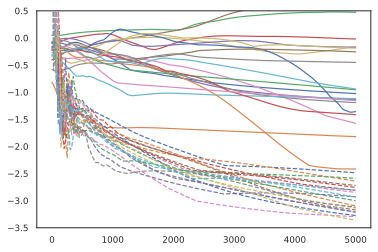

In [38]:
plt.plot(epoch, MAE_grad)
plt.plot(epoch, MAE_lstsq, '--')
plt.ylim([-3.5, 0.5])

(-2.0, 2.0)

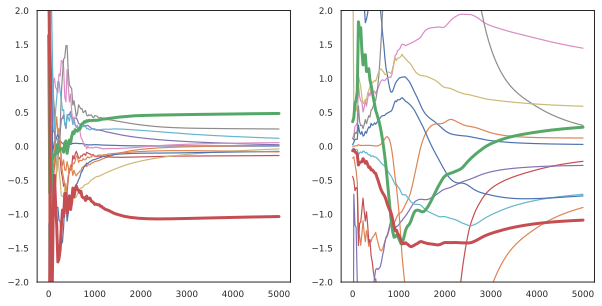

In [129]:
plt.figure(figsize=(10, 5))

run = 7

plt.subplot(121)
plt.plot(df_lstsq[run][keys['coeffs']])
plt.plot(df_lstsq[run][keys['coeffs'][2]], lw=3)
plt.plot(df_lstsq[run][keys['coeffs'][5]], lw=3)
plt.ylim([-2, 2])

plt.subplot(122)

plt.plot(df_grad[run][keys['coeffs']])
plt.plot(df_grad[run][keys['coeffs'][2]], lw=3)
plt.plot(df_grad[run][keys['coeffs'][5]], lw=3)
plt.ylim([-2, 2])

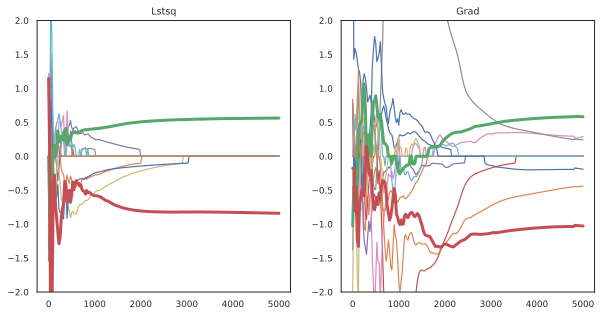

In [130]:
plt.figure(figsize=(10, 5))

run = 7

plt.subplot(121)
plt.plot(df_lstsq[run][keys['estimator_coeffs']])
plt.plot(df_lstsq[run][keys['estimator_coeffs'][2]], lw=3)
plt.plot(df_lstsq[run][keys['estimator_coeffs'][5]], lw=3)
plt.ylim([-2, 2])
plt.title('Lstsq')

plt.subplot(122)

plt.plot(df_grad[run][keys['estimator_coeffs']])
plt.plot(df_grad[run][keys['estimator_coeffs'][2]], lw=3)
plt.plot(df_grad[run][keys['estimator_coeffs'][5]], lw=3)
plt.ylim([-2, 2])
plt.title('Grad')

plt.show()

(-2.0, 2.0)

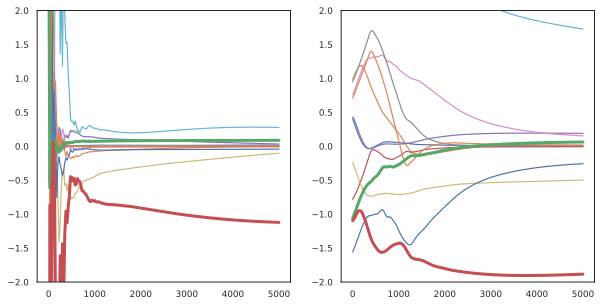

In [150]:
plt.figure(figsize=(10, 5))

run = 4

plt.subplot(121)
plt.plot(df_lstsq[run][keys['unscaled_coeffs']])
plt.plot(df_lstsq[run][keys['unscaled_coeffs'][2]], lw=3)
plt.plot(df_lstsq[run][keys['unscaled_coeffs'][5]], lw=3)
plt.ylim([-2, 2])

plt.subplot(122)

plt.plot(df_grad[run][keys['unscaled_coeffs']])
plt.plot(df_grad[run][keys['unscaled_coeffs'][2]], lw=3)
plt.plot(df_grad[run][keys['unscaled_coeffs'][5]], lw=3)
plt.ylim([-2, 2])

In [117]:
true_scaled_coeffs = df_lstsq[7][keys['estimator_coeffs']].tail(1).to_numpy()

In [118]:
MAE_lstsq = np.mean(np.log(np.stack([np.mean(np.abs(df[keys['estimator_coeffs']] - true_scaled_coeffs), axis=1) for df in df_lstsq], axis=1)), axis=1)
MAE_grad = np.mean(np.log(np.stack([np.mean(np.abs(df[keys['estimator_coeffs']] - true_scaled_coeffs), axis=1) for df in df_grad], axis=1)), axis=1)

MAE_lstsq_std = np.std(np.log(np.stack([np.mean(np.abs(df[keys['estimator_coeffs']] - true_scaled_coeffs), axis=1) for df in df_lstsq], axis=1)), axis=1)
MAE_grad_std = np.std(np.log(np.stack([np.mean(np.abs(df[keys['estimator_coeffs']] - true_scaled_coeffs), axis=1) for df in df_grad], axis=1)), axis=1)

<ipython-input-118-79b9f88e8c9f>:1: RuntimeWarning: divide by zero encountered in log
  MAE_lstsq = np.mean(np.log(np.stack([np.mean(np.abs(df[keys['estimator_coeffs']] - true_scaled_coeffs), axis=1) for df in df_lstsq], axis=1)), axis=1)
<ipython-input-118-79b9f88e8c9f>:4: RuntimeWarning: divide by zero encountered in log
  MAE_lstsq_std = np.std(np.log(np.stack([np.mean(np.abs(df[keys['estimator_coeffs']] - true_scaled_coeffs), axis=1) for df in df_lstsq], axis=1)), axis=1)
/home/gert-jan/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Text(0.5, 1.0, 'Mean coeff error')

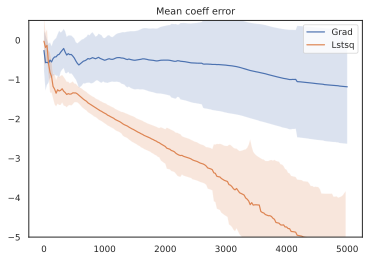

In [121]:
plt.fill_between(epoch, MAE_grad - MAE_grad_std, MAE_grad + MAE_grad_std, alpha=0.2)
plt.plot(epoch, MAE_grad, label='Grad')

plt.fill_between(epoch, MAE_lstsq - MAE_lstsq_std, MAE_lstsq + MAE_lstsq_std, alpha=0.2)
plt.plot(epoch, MAE_lstsq, label='Lstsq')

plt.legend()
plt.ylim([-5, 0.5])
plt.title('Mean coeff error')